# What is GIS?

GIS, short for Geographic Information System, is the name given to the analysis of data that includes geospatial information. Often times, GIS data will look very much like data that you're used to -- e.g. it may come in the form of a tabular data set where each row is a different observation and each column is a different variable -- but with the addition of information about a location or region associated with each observation. 

GIS data comes in two main flavors: vector data and raster data. 

## Vector Data

Vector data is data in which the geospatial information comes in the form of geometric shapes -- points, lines, or polygons. Vector data is extremely common when data is about specific locations like stores, customers, etc. (points); about roads, rivers, or routes (lines); or administrative boundaries like media markets, or political boundaries (polygons). 

For example, one common form of GIS data you may come across may consist of information on the demographic characteristics of different countries (income, population, growth rate, etc.). Like most tabular data you work with, you could open up this data in an Excel spreadsheet and see that each row is a different neighborhood, and each column is another variable.

In addition to this tabular data, however, a GIS data set will also include geographic information about each row in the data set -- for example the borders of each country.

In fact, the fact that vector data can be thought of as a tabular data set + geographic data for each row means that and Python we can represent it as a regular pandas DataFrame with an extra column that stores the geographic information for each row. This allows us to do all the things were used to with pandas (subsetting based on column values, merging, sampling, etc.), *plus* take advantage of all of the spatial relationships implied by this geographic data!

To illustrate, here's a simple vector dataset of all the countries in the world. Initially, you can see it basically just looks like a regular pandas DataFrame, except that it has a `geometry` column at the end full of `POLYGON` and `MULTIPOLYGON` objects. 

In [4]:
import geopandas as gpd
import numpy as np

# Load GIS data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Drop antarctica and adjust projection 
# (we'll talk about projections later!)
world = world[world.continent != "Antarctica"]
world = world.to_crs("+proj=cea +lon_0=0 +lat_ts=45 +x_0=0 +y_0=0 +ellps=WGS84 +units=m +no_defs ")

# Inspect. 
world.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
117,21529967,Europe,Romania,ROU,441000.0,"POLYGON ((2226126.337 6393018.722, 2261309.844..."
107,82021564,Asia,Iran,IRN,1459000.0,"POLYGON ((3829430.818 4467389.569, 3785796.750..."
153,10674723,Europe,Czechia,CZE,350900.0,"POLYGON ((1184042.598 6980662.438, 1221414.124..."
55,19245344,Africa,Niger,NER,20150.0,"POLYGON ((1170978.002 3477594.707, 1190341.811..."
85,2314307,Asia,Qatar,QAT,334500.0,"POLYGON ((4006216.228 3748374.018, 4000996.764..."




But unlike a normal DataFrame, we can also use the associated `geometry` column to do fun things, like plot the world!

<AxesSubplot:>

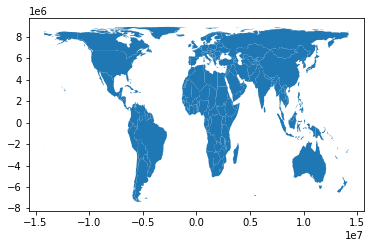

In [5]:
world.plot()

And of course, we can combine these two sources of information -- here's a bit of code to calculate the area of each country, divide population by area to get population density, then make a map colored by population density. (Note I'm also gonna do something called re-projecting our data first for reasons we'll discuss later):

<AxesSubplot:>

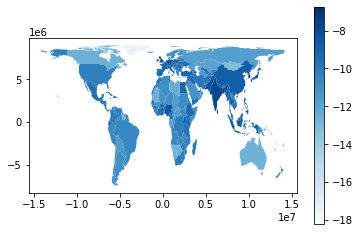

In [6]:
# Make Pop Density and plot
world["pop_density"] = np.log(world["pop_est"] / world.area)
world.plot("pop_density", cmap="Blues", legend=True)

## Raster Data

The other common form of GIS data is raster data, which is how we store things like satellite photos, or satellite radar scans of elevation. Unlike vector data -- which usually consists of tabular data with geometric shapes associated with each observation -- raster data will generally come to you as an image file with some associated data about where each pixel in that image is on the earth. 

Why is raster data stored as an image file? Because raster data often is the output of a camera, or something that works *like* a camera (e.g. a radar scanner) that collects data about regularly spaced points (pixels) across a scanned region.

For example, here's a raster dataset of air pollution across the world:

## Why Do We Want GIS Data?

Now you that you have a bit of a feel for what GIS data looks like, you may be asking yourself "ok, but why is it useful to have geospatial data associated with your data? Here's just a handful of reasons that we'll explore more in the coming days:

- **It's the only way to measure things we couldn't measure otherwise:**: Suppose you want to know about air quality or surface temperature *for the entire planet*? How do you measure that? Well, with satellites of course! But if you get data from a satellite pointing an instrument at the Earth, GIS is the only way to do anything useful with it. On their own, the readings from satellite instruments are just pictures; it's only when we're able to map specific pixels to specific locations on the earth that we can begin the use them to better understand the world. For example, suppose you have a satellite that measures air pollution -- if you can't match readings with specific cities / factories / communities, there's not much you can do with it!
- **Measuring Spatial Relationships**: Often times we want spatial data because we're directly interested spatial relationships. For example, suppose you have a dataset of possible locations for new stores -- how far are each of those possible locations from existing stores whose sales they might cannibalize? Or how far are each of those locations from the nearest supply depot? 
- **Connecting Datasets**: I'm a firm believer that one of the best way to generate insights is to merge different data sets together. For example, merging data on prescription opioid drug shipments and data on drug overdoses makes it possible to understand the role of legal opiates in driving drug overdoses. But *most* of the time, datasets don't come with common identifiers you can use for merging. But *any* GIS data can be related to any other GIS data, because we know how any two GIS datasets relate *spatially*. For example, if you have data from the US Census Bureau on average incomes in different neighborhoods, then you can combine it with a dataset on possible store locations to answer the question "what is the average income of people within 3 miles of this possible location?" 
- **Spatial Interpolation:** Suppose you have data on soil quality measured at a handful of random points, and you want to try and estimate what soil quality may look like at a location between the points you're measured to help a builder. With spatial interpolation, you can generate a model of soil quality over the entire area from which you got a few discrete measurements! (This is the kind of thing people in the oil and mineral business do a lot -- you collect data from a handful of wells, then try and interpolate what's going on between them).
- **Improving Statistical Efficiency:** In *most* of life, things that are close to one another will tend to have correlated outcomes. There's an entire discipline of spatial statistics that tries to model spatial correlations, and use that information to improve the efficiency of standard statistical modelling strategies. 

## What Comes Next

As you can see from the discussion above, GIS / spatial analysis is a huge specialization, and we won't be able to learn every spatial analysis technique in this class. Instead, the goal of the next few lessons is to ensure that when you leave this class, you can:

- Recognize the main kinds of geospatial data, and know what libraries to use to work with them,
- Load, manipulate, and visualize (map) vector data with geopandas,
- Understand how we represent locations on the three-dimensional Earth in two-dimensional plots,
- Merge GIS datasets based on their spatial relationships
- Understand what can be done with GIS data so that you can recognize situations in which GIS is the right tool to use, know where to go to learn more.